In [1]:
!pip install bing-image-downloader


In [2]:
cd /content/drive/My Drive/Mini Project

/content/drive/My Drive/Mini Project


In [3]:
!mkdir images

In [4]:
cd images

/content/drive/My Drive/Mini Project/images


In [10]:
from bing_image_downloader import downloader
downloader.download("cat animal",limit = 300,output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from http://2.bp.blogspot.com/-WtdFq_e6eKo/TV5W5s-hS-I/AAAAAAAAAvM/gmCUYOx3bX8/s1600/Animals_Cats_Small_cat_005241_.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://4.bp.blogspot.com/-MzZCzWI_6Xc/UIUQp1qPfzI/AAAAAAAAHpA/OTwHCJSWFAY/s1600/cats_animals_kittens_cat_kitten_cute_desktop_1680x1050_hd-wallpaper-753974.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg/1200px-An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg/1200px-An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/An_u

In [11]:
downloader.download("dog animal",limit = 300,output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from https://www.guidedogs.org/wp-content/uploads/2018/01/Mobile.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.cambridgema.gov/~/media/Images/sharedphotos/departmentphotos/animal.jpg?mw=1920
[%] File Downloaded !

[%] Downloading Image #3 from https://www.nationalgeographic.com/content/dam/animals/thumbs/rights-exempt/mammals/d/domestic-dog_thumb.ngsversion.1546554600360.adapt.1900.1.jpg
[!] Issue getting: https://www.nationalgeographic.com/content/dam/animals/thumbs/rights-exempt/mammals/d/domestic-dog_thumb.ngsversion.1546554600360.adapt.1900.1.jpg
[!] Error:: The read operation timed out
[%] Downloading Image #3 from https://i.ytimg.com/vi/JhLGw0bLHSs/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://canna-pet.com/wp-content/uploads/2017/05/weak-bones-in-dogs-canna-pet-e1494006685163.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://r

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [13]:
dir = '/content/drive/My Drive/Mini Project/images/images'
categories= ['cat animal','dog animal']

In [14]:
data= []
for category in categories  :
    path=os.path.join(dir,category)
    label=categories.index(category)
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        
        pet = cv2.imread(imgpath,0)
        try:
           pet = cv2.cvtColor(pet,cv2.COLOR_BGR2RGB)
           pet = cv2.resize(pet,(64,64))
           image=np.array(pet).flatten()
           data.append([image,label])
        except Exception as e:
          pass

print(len(data))

605


In [15]:
pick_in=open('data.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [16]:
pick_in=open('data.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [17]:
random.shuffle(data)
features = []
labels = []

In [18]:
for feature ,label in data:
  features.append(feature)
  labels.append(label)

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size= 0.98)

In [20]:
model = SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
pick = open('model.sav','wb')
pickle.dump(model,pick)
pick.close()

In [22]:
pick = open('model.sav','rb')
model = pickle.load(pick)
pick.close()

In [23]:
prediction = model.predict(xtest)
accuracy = model.score(xtest,ytest)

In [24]:
categories = ['cat animal','dog animal']

In [25]:
print('Accuracy :',accuracy)
print('Prediction  is :',categories[prediction[0]])

Accuracy : 0.5126475548060708
Prediction  is : dog animal


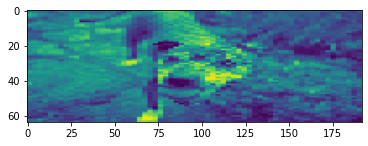

In [26]:
mypet = xtest[0].reshape(64,192)
cv2.cvtColor(mypet,cv2.COLOR_BGR2RGB)
plt.imshow(mypet)
plt.show()